In [1]:
#load
print('loading data...')
import numpy as np
file=open('adult.data')
r_X=[]
r_y=[]
for line in file.readlines():
    items=str(line).split(',')
    r_X.append(items[:-1])
    r_y.append(items[-1]==' >50K\n')
del r_X[32561],r_y[32561]
y=np.array(r_y).astype('int')
X=np.array(r_X)
def count(row):
    index=dict()
    names=set()
    for i in row:
        if i not in names:
            names.add(i)
    for i in names:
        i_num=(row[y==1]==i).sum()
        index[i]=i_num
    for i in range(len(index.keys())):
        max_index=min(index)
        row[row==max_index]=index[max_index]
        del index[max_index]
    return row.astype('float')
print(X[0])
for num in [1,3,5,6,7,8,9,13]:
    count(X[:,num])
X=np.matrix(X.astype(float)).T
X=X/(X.max(axis=1)-X.min(axis=1))
print(X[9,:])
print('done!')

loading data...
['39' ' State-gov' ' 77516' ' Bachelors' ' 13' ' Never-married'
 ' Adm-clerical' ' Not-in-family' ' White' ' Male' ' 2174' ' 0' ' 40'
 ' United-States']
[[1.21502827 1.21502827 1.21502827 ... 0.21502827 1.21502827 0.21502827]]
done!


In [2]:
X.shape,y.shape,(y==0).sum()/X.shape[1],X
X[:,0]

matrix([[0.53424658],
        [0.07112633],
        [0.05264531],
        [1.        ],
        [0.86666667],
        [0.07348099],
        [0.25775292],
        [0.14555348],
        [1.0035251 ],
        [1.21502827],
        [0.02174022],
        [0.        ],
        [0.40816327],
        [1.        ]])

used time: 3.278 s


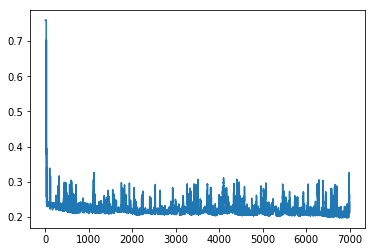

min_val_error: 0.19698412210927183 best_epoch: 6817
accuracy: 80.30%


matrix([[-0.99825192, -0.45173206, -1.47257706, -0.18911068,  0.29329411,
          1.67148979,  1.91220835,  1.01069696, -0.58294323, -1.12385166,
          2.88566712,  1.67658864, -0.55766929, -0.92827047]])

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import random
from sklearn.model_selection import train_test_split
import time

def sigmoid(m):
    return 1/(1+np.exp(-m))
def get_result(X,theta):
    return (sigmoid(theta.dot(X.T))>=0.5).astype('int')
def fit(X,y,theta,eta):
    for i in range(1):
        delta=1/X.shape[1]*((sigmoid(theta.dot(X))-y).dot(X.T))
        theta=theta-eta*delta
    return theta
def small_gra_train(X,y):
    p_x=[]
    p_y=[]
    since=time.time()
    x_val,y_val=X,y
    x_val=x_val.T
    theta=np.matrix(np.random.rand(1,X.shape[0]))
    eta=0.1
    min_val_error=float('inf')
    for i in range(7000):
        random_num=random.randint(0,X.shape[1]-1)
        x_train,y_train=X[:,random_num],y[random_num]
        theta=fit(x_train,y_train,theta,eta)
        val_error=(get_result(x_val,theta)!=y_val).sum()/len(y_val)
        p_x.append(i)
        p_y.append(val_error)
        if val_error<min_val_error:
            min_val_error=val_error
            best_theta=theta
            best_epoch=i
    print('used time:',str(time.time()-since)[:5],'s')
    plt.plot(p_x,p_y)
    plt.show()
    print('min_val_error:',min_val_error,'best_epoch:',best_epoch)
    pre_y=get_result(X.T,best_theta)
    print('accuracy:',str(100*(pre_y==y).sum()/X.shape[1])[:5]+'%') #小批量梯度下降 正确率81%
    return best_theta
small_gra_train(X,y)

In [4]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X.T,y)
pre_y=clf.predict(X.T)
(pre_y==y).sum()/len(y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8450907527410092